In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install prophet


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


In [ ]:
df = pd.read_csv(
    "/content/drive/MyDrive/FitPulse_Milestone1/data/minute_level_data.csv"
)
df["timestamp"] = pd.to_datetime(df["timestamp"])


In [ ]:
user_id = df["Id"].iloc[0]
hr_df = df[df["Id"] == user_id][["timestamp", "HeartRate"]]

hr_df = hr_df.rename(columns={
    "timestamp": "ds",
    "HeartRate": "y"
})


In [ ]:
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True
)

model.fit(hr_df)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


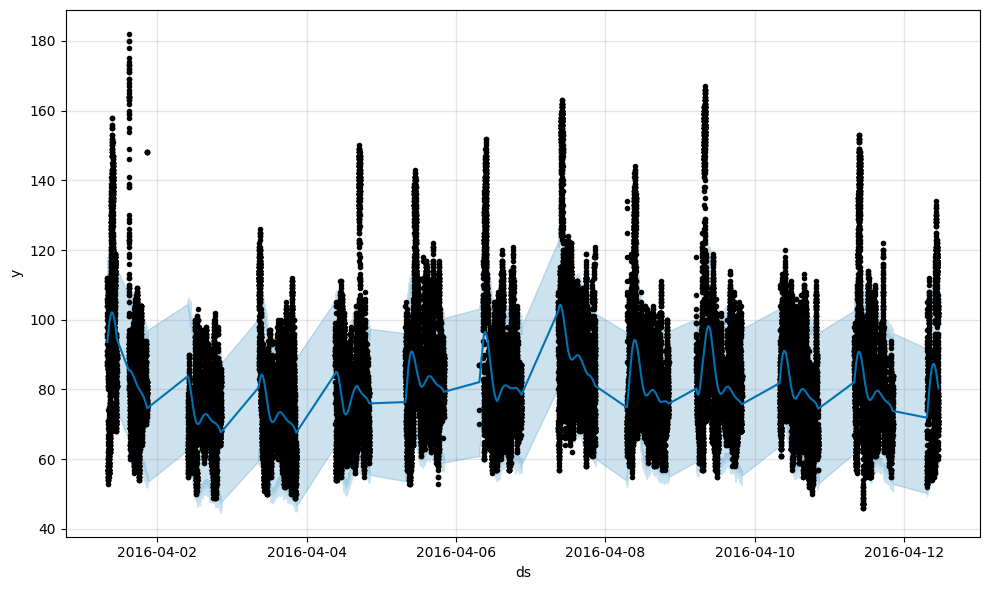

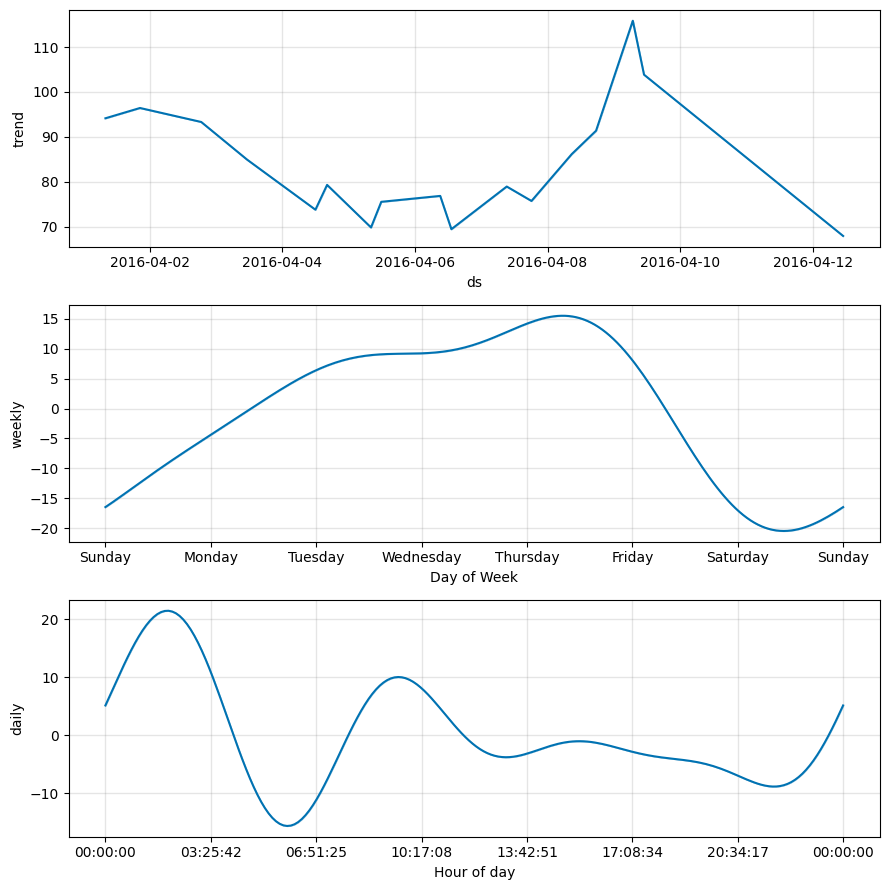

In [ ]:
forecast = model.predict(model.make_future_dataframe(periods=0))

model.plot(forecast)
plt.show()

model.plot_components(forecast)
plt.show()


In [ ]:
features = pd.read_csv(
    "/content/drive/MyDrive/FitPulse_Milestone2/data/tsfresh_features.csv",
    index_col=0
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
    eps=3.0,        # ⬅️ increased
    min_samples=2
)

clusters = dbscan.fit_predict(X_scaled)
features["cluster"] = clusters
features


,value__sum_values,value__median,value__mean,value__length,value__standard_deviation,value__variance,value__root_mean_square,value__maximum,value__absolute_maximum,value__minimum,cluster
2022484408,50818.0,78.5,84.696667,600.0,24.436816,597.157989,88.151479,155.0,155.0,53.0,-1
2026352035,28877.0,63.0,65.779043,439.0,5.530937,30.591269,66.011164,80.0,80.0,57.0,-1
2347167796,40270.0,67.0,67.116667,600.0,4.448939,19.793056,67.263958,89.0,89.0,59.0,0
4020332650,41919.0,70.0,69.865000,600.0,2.307258,5.323442,69.903088,75.0,75.0,63.0,0
4558609924,48976.0,82.0,81.626667,600.0,7.051522,49.723956,81.930682,102.0,102.0,61.0,-1


In [ ]:
features["cluster"] = clusters
features


,value__sum_values,value__median,value__mean,value__length,value__standard_deviation,value__variance,value__root_mean_square,value__maximum,value__absolute_maximum,value__minimum,cluster
2022484408,50818.0,78.5,84.696667,600.0,24.436816,597.157989,88.151479,155.0,155.0,53.0,-1
2026352035,28877.0,63.0,65.779043,439.0,5.530937,30.591269,66.011164,80.0,80.0,57.0,-1
2347167796,40270.0,67.0,67.116667,600.0,4.448939,19.793056,67.263958,89.0,89.0,59.0,0
4020332650,41919.0,70.0,69.865000,600.0,2.307258,5.323442,69.903088,75.0,75.0,63.0,0
4558609924,48976.0,82.0,81.626667,600.0,7.051522,49.723956,81.930682,102.0,102.0,61.0,-1


In [ ]:
anomalies = features[features["cluster"] == -1]
anomalies


,value__sum_values,value__median,value__mean,value__length,value__standard_deviation,value__variance,value__root_mean_square,value__maximum,value__absolute_maximum,value__minimum,cluster
2022484408,50818.0,78.5,84.696667,600.0,24.436816,597.157989,88.151479,155.0,155.0,53.0,-1
2026352035,28877.0,63.0,65.779043,439.0,5.530937,30.591269,66.011164,80.0,80.0,57.0,-1
4558609924,48976.0,82.0,81.626667,600.0,7.051522,49.723956,81.930682,102.0,102.0,61.0,-1


In [ ]:
features.to_csv(
    "/content/drive/MyDrive/FitPulse_Milestone2/data/dbscan_clustered_features.csv"
)


In [ ]:
X = features.drop(columns=["cluster"])
y = features["cluster"]


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


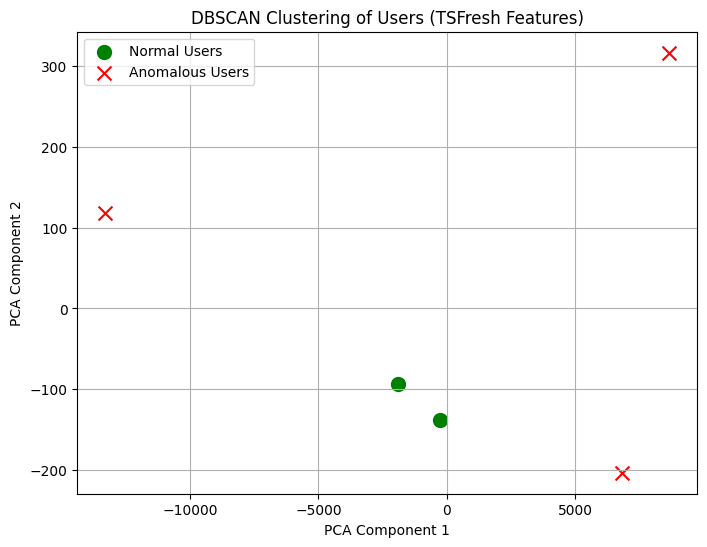

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(
    X_pca[y != -1, 0],
    X_pca[y != -1, 1],
    c="green",
    label="Normal Users",
    s=100
)

plt.scatter(
    X_pca[y == -1, 0],
    X_pca[y == -1, 1],
    c="red",
    label="Anomalous Users",
    s=100,
    marker="x"
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering of Users (TSFresh Features)")
plt.legend()
plt.grid(True)
plt.show()
